In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
loans = pd.read_csv('./ml_source_files/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [96]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [97]:
y = loans['not.fully.paid']
x = loans.drop(['not.fully.paid'], axis=1)

In [98]:
# 대출을 가능여부 판단-모델..
# 데이터 - 고객의 특성에 따라 default 여부가 있는 데이터..

# => decisiontree, randomforest를 통해서 예측모델 셍성, 테스트...

In [99]:
# one hot encoding
# pd.get_dummies()
# 문자열 칼럼의 데이터의 종류수 만큼 칼럼이 만들어진다..
# 문자열 칼럼의 데이터 수의 종류가 너무 많으면 칼럼이 너무 많이 생긴다.. => 머신러닝 학습에 방해가 된다..
# 문자열 칼럼의 데이터 수가 너무 낳으면 one hot 방식으로 바꾸는 것을 지양해야 한다.

In [100]:
x = pd.get_dummies(x)

In [101]:
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0,0


In [72]:
loans.purpose.nunique()

7

In [102]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(loans['purpose'])
# label = le.transform(loans['purpose'])
# loans['purpose'] = label

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

In [104]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [105]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [106]:
preds = tree.predict(x_test)

In [107]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [108]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1635
           1       0.19      0.25      0.21       281

    accuracy                           0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.76      0.74      0.75      1916



In [41]:
print(precision_score(y_test, preds))

0.18696883852691218


In [42]:
print(recall_score(y_test, preds))

0.23487544483985764


In [36]:
from sklearn.tree import plot_tree

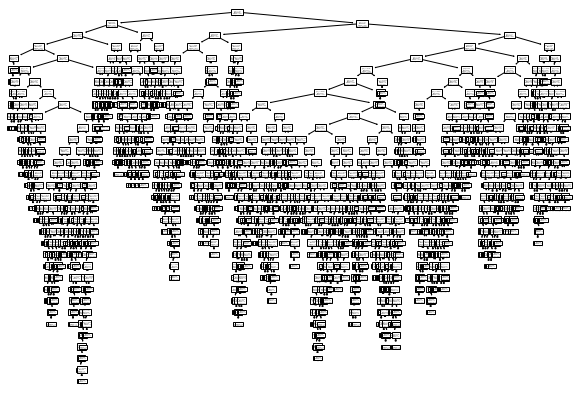

In [37]:
plt.figure(figsize=(10,7))
plot_tree(tree)
plt.show()

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)

In [119]:
rfc.fit(x_train, y_train)
preds = rfc.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1635
           1       0.37      0.02      0.05       281

    accuracy                           0.85      1916
   macro avg       0.61      0.51      0.48      1916
weighted avg       0.78      0.85      0.79      1916



In [109]:
# gridsearch

In [110]:
from sklearn.model_selection import GridSearchCV

In [113]:
params = {'n_estimators': [50,100,500,1000],
         'max_depth': [10,20,50,100],
         'min_samples_leaf': [2,3,5]}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid = params, refit=True, verbose=True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [2, 3, 5],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=True)

In [117]:
grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 50}